In [1]:
%load_ext autoreload
# to make modification in .py file type %autoreload

%load_ext line_profiler
#for finding out how long code takes to run
#an example of how to get diagnostics on functions
#%lprun -f ff.generate_map_full ff.generate_map_full(384, A_BB, alpha_BB, beta_sigma, freqs, nu0)

In [3]:
#trying to consolidate the work so far into a cohesive document and notation. Pushing definitions into 
#separate .py file

#------packages-------------------
%pylab inline
import time
import healpy as hp
import matplotlib.pyplot as plt
import foreground_functions as ff
from scipy.optimize import curve_fit, minimize

Populating the interactive namespace from numpy and matplotlib


In [4]:
nside = 128
A = 1.7e3
alpha = -3.0
beta = -3.2
gamma = -2.5
ells = np.arange(3*nside)
freqs = np.linspace(30, 300, 5)*1.e9
filepath = '/Users/alex/Documents/foreground_moments/power_spectra/'

In [40]:
%autoreload

In [6]:
# a = ff.get_wigner_sum()
# save(filepath + 'default_wigner_sum.npy', a)

In [7]:
a = load(filepath + 'default_wigner_sum.npy')

In [69]:
%lprun -f ff.get_wigner_sum ff.get_wigner_sum()

In [70]:
c = ff.get_wigner_sum()
print(a-c)

[2.22149261e+09 6.54192219e+08 8.36864857e+08 3.75167841e+08
 7.60926611e+08 3.85548413e+08 1.98704394e+08 1.10279174e+08
 6.56344932e+07 4.14280272e+07 2.74481282e+07 1.89300137e+07
 1.34998863e+07 9.90319517e+06 7.44176704e+06 5.70922154e+06
 4.45959291e+06 3.53883146e+06 2.84751021e+06 2.31972697e+06
 1.91075409e+06 1.58958530e+06 1.33431295e+06 1.12918942e+06
 9.62716752e+05 8.26379535e+05 7.13788517e+05 6.20092094e+05
 5.41565455e+05 4.75319628e+05 4.19092700e+05 3.71098123e+05
 3.29913251e+05 2.94396559e+05 2.63625534e+05 2.36849659e+05
 2.13454502e+05 1.92934058e+05 1.74869286e+05 1.58911336e+05
 1.44768340e+05 1.32194951e+05 1.20984007e+05 1.10959838e+05
 1.01972882e+05 9.38953100e+04 8.66174669e+04 8.00449601e+04
 7.40962616e+04 6.87007295e+04 6.37969668e+04 5.93314551e+04
 5.52574118e+04 5.15338323e+04 4.81246827e+04 4.49982183e+04
 4.21264062e+04 3.94844338e+04 3.70502897e+04 3.48044063e+04
 3.27293518e+04 3.08095662e+04 2.90311337e+04 2.73815853e+04
 2.58497289e+04 2.442550

In [38]:
b = ff.get_wigner_sum()
print(b.shape)

(384,)


In [39]:
print(a-ff.get_wigner_sum())

[2.22149261e+09 6.54192219e+08 8.36864857e+08 3.75167841e+08
 7.60926611e+08 3.85548413e+08 1.98704394e+08 1.10279174e+08
 6.56344932e+07 4.14280272e+07 2.74481282e+07 1.89300137e+07
 1.34998863e+07 9.90319517e+06 7.44176704e+06 5.70922154e+06
 4.45959291e+06 3.53883146e+06 2.84751021e+06 2.31972697e+06
 1.91075409e+06 1.58958530e+06 1.33431295e+06 1.12918942e+06
 9.62716752e+05 8.26379535e+05 7.13788517e+05 6.20092094e+05
 5.41565455e+05 4.75319628e+05 4.19092700e+05 3.71098123e+05
 3.29913251e+05 2.94396559e+05 2.63625534e+05 2.36849659e+05
 2.13454502e+05 1.92934058e+05 1.74869286e+05 1.58911336e+05
 1.44768340e+05 1.32194951e+05 1.20984007e+05 1.10959838e+05
 1.01972882e+05 9.38953100e+04 8.66174669e+04 8.00449601e+04
 7.40962616e+04 6.87007295e+04 6.37969668e+04 5.93314551e+04
 5.52574118e+04 5.15338323e+04 4.81246827e+04 4.49982183e+04
 4.21264062e+04 3.94844338e+04 3.70502897e+04 3.48044063e+04
 3.27293518e+04 3.08095662e+04 2.90311337e+04 2.73815853e+04
 2.58497289e+04 2.442550

In [19]:
cls_2d = cls[newaxis, newaxis]

In [20]:
cls_2d.shape

(1, 1, 10)

In [21]:
cls_2d

array([[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]])

In [23]:
cls[newaxis] = cls

In [24]:
cls

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [108]:
#for fun let's imagine 
#ell runs from 0 to 10
#ell1 runs fomr 0 to 5
#ell2 runs from 0 to 5

In [132]:
w3j = np.ones((10,10,10))

In [159]:
#the cls we want to insert along the ell1 direction, so the should have length 5
amp_cls = np.arange(10, 20)
#beta_cls go along the ell2 direction so have length 7
beta_cls = np.arange(10)

(10,)


In [113]:
#test what multiplications are allowed

In [114]:
b = w3j[0,:,0]*amp_cls
c = w3j[:,:,0]*amp_cls
d = amp_cls*w3j[:,:,0]
print(b.shape, c.shape, d.shape)

(5,) (10, 5) (10, 5)


In [115]:
%autoreload

In [116]:
start=time.time()
ff.get_wigner_sum()
print(time.time()-start)

(384, 384, 384)
(384,)
(384,)
(384, 384, 384)
(512, 384, 512)
(512, 384, 512)
3.3283560276031494


In [162]:
big_amp = np.ones_like(w3j)

In [191]:
start=time.time()
big_amp = np.zeros((384,384,384))
big_beta = big_amp
amp_cls_2 = np.arange(384)
beta_cls_2 = np.arange(384)
N=384
for i in range(N):
    for j in range(N):
        big_amp[i,:,j] = amp_cls_2
        big_beta[i, j, :] = beta_cls_2
c = big_beta * big_amp
d = sum(c, (1,2))
#     big_amp[i,:,:] *= amp_cls
#     big_amp[:,:,i] *= amp_cls
# big_amp *= 0.1
# big_amp *= 0.5
# big_amp = np.sqrt(big_amp)
print(time.time()-start)

1.015523910522461


In [184]:
for i in range(10):
    print(big_amp[0,:,i])

[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]


In [127]:
big_amp[:,0,:]

array([[0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.]])

In [46]:
#load in some data
PS_data = ff.PS_data(freqs, A, alpha, beta, gamma)

In [49]:
%autoreload

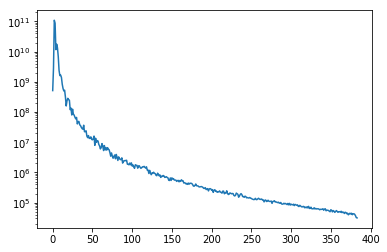

In [47]:
semilogy(ells,PS_data[0])

In [59]:
start=time.time()
mom00 = ff.auto0x0(freqs)
mom11 = ff.auto1x1(freqs)
print(time.time()-start)
# mom02 = ff.auto0x2(freqs)

0.09110808372497559


In [66]:
%autoreload

In [67]:
mom02 = ff.auto0x2(freqs)

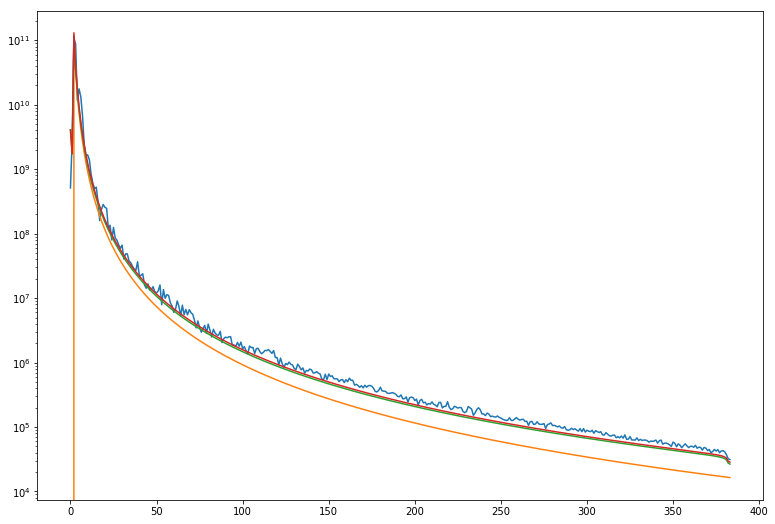

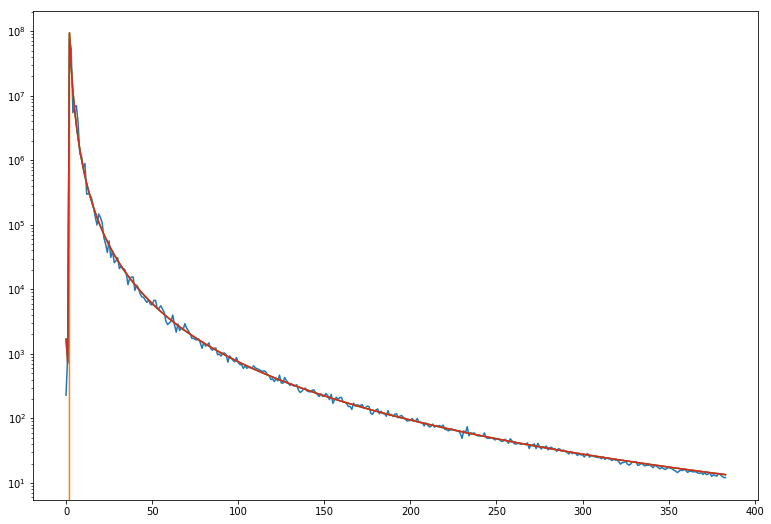

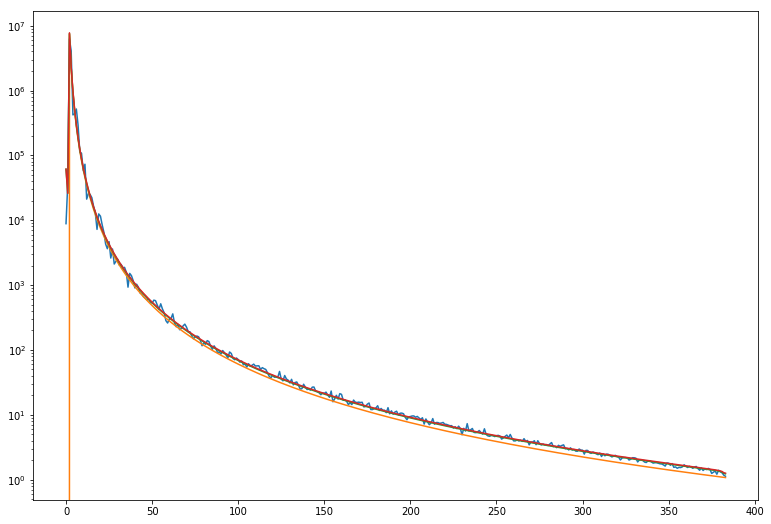

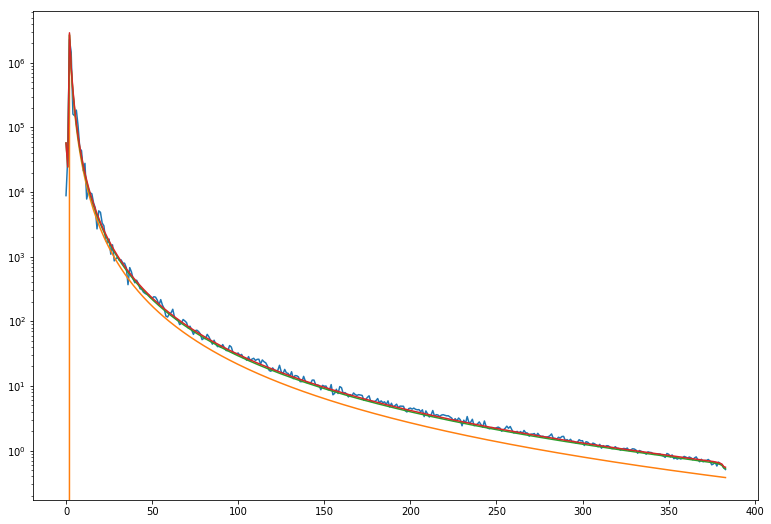

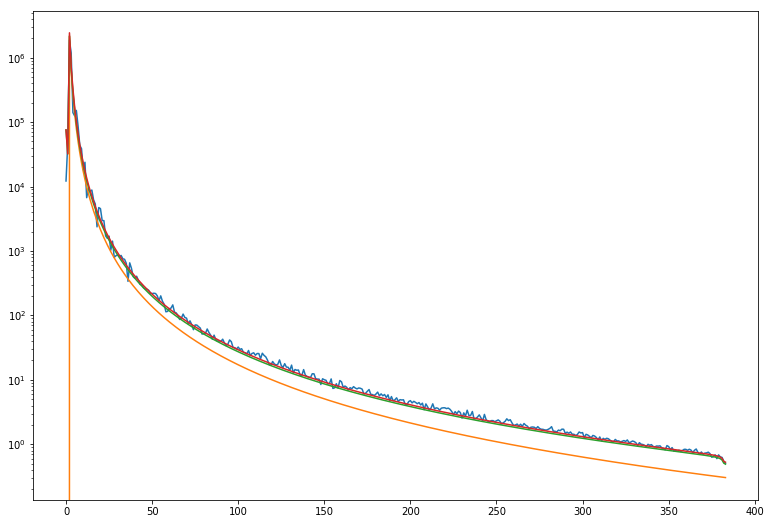

In [68]:
for i in range(len(freqs)):
    figure(figsize=(13,9))
    semilogy(ells, PS_data[i])
    semilogy(ells, mom00[i])
    semilogy(ells, mom00[i]+mom11[i])
    semilogy(ells, mom00[i]+mom11[i]+mom02[i])

In [65]:
bcls = ff.bcls()